# Pretrained GAN Model Exploration

In [21]:
!pip install git+https://github.com/tensorflow/docs
!pip -q install imageio
!pip -q install scikit-image


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-2tai0dz8
  Running command git clone --filter=blob:none --quiet https://github.com/tensorflow/docs /tmp/pip-req-build-2tai0dz8
  Resolved https://github.com/tensorflow/docs to commit 0feefb5266db5bce6ee107920b581d1e3443f511
  Preparing metadata (setup.py) ... done


In [56]:
from absl import logging
import imageio

import tensorflow as tf
tf.random.set_seed(0)

import tensorflow_hub as hub
from tensorflow_docs.vis import embed
import time

try:
  from google.colab import files
except ImportError:
  pass

from skimage import transform
import PIL.Image
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm

## Load Model

In [3]:
progan = hub.load("https://tfhub.dev/google/progan-128/1").signatures['default']

## Set Latent Dim based on model architecture

In [4]:
latent_dim = 512

In [5]:
tf.random.set_seed(42)
initial_vector = tf.random.normal([1, latent_dim])

In [14]:
progan(initial_vector)['default'][0]

<tf.Tensor: shape=(128, 128, 3), dtype=float32, numpy=
array([[[1.40524507e-02, 0.00000000e+00, 0.00000000e+00],
        [6.30541444e-02, 0.00000000e+00, 0.00000000e+00],
        [5.63830137e-03, 0.00000000e+00, 0.00000000e+00],
        ...,
        [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
        [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
        [1.00000000e+00, 1.00000000e+00, 1.00000000e+00]],

       [[1.21419042e-01, 2.18752325e-02, 0.00000000e+00],
        [7.43799806e-02, 5.69581985e-04, 0.00000000e+00],
        [5.09060025e-02, 0.00000000e+00, 0.00000000e+00],
        ...,
        [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
        [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
        [1.00000000e+00, 1.00000000e+00, 1.00000000e+00]],

       [[7.22618699e-02, 0.00000000e+00, 0.00000000e+00],
        [7.98080564e-02, 7.58913159e-03, 0.00000000e+00],
        [1.23243332e-01, 4.07646000e-02, 0.00000000e+00],
        ...,
        [1.00000000e+00, 1.00000

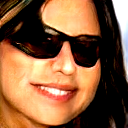

In [22]:
image = progan(initial_vector)['default'][0].numpy()

image_processed = (image*255).astype(np.uint8)
PIL.Image.fromarray(image_processed)

In [23]:
images = []

for i in range(64):
    initial_vector = tf.random.normal([1, latent_dim])
    image = progan(initial_vector)['default'][0].numpy()

    image_processed = (image*255).astype(np.uint8)
    images.append(PIL.Image.fromarray(image_processed))


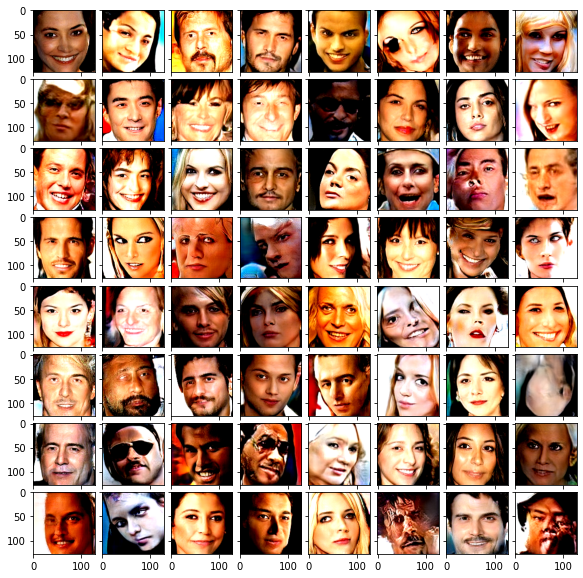

In [26]:
from mpl_toolkits.axes_grid1 import ImageGrid

fig = plt.figure(figsize=(10, 10))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(8, 8),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )

for ax, im in zip(grid, images):
    # Iterating over the grid returns the Axes.
    ax.imshow(im)

plt.show()

In [43]:
def generate_gan_image(noise = None):
    if noise is None:
        noise = tf.random.normal([1, latent_dim])
    
    image = progan(noise)['default'][0].numpy()

    image_processed = (image*255).astype(np.uint8)
    return PIL.Image.fromarray(image_processed)

## Latent Space Interpolations

In [44]:
noise_1 = tf.random.normal([1, latent_dim])
noise_2 = tf.random.normal([1, latent_dim])


vec = noise_2 - noise_1
noise = noise_1

steps = 10

images = []
for i in range(steps):
    noise = noise + (1/steps)*vec
    images.append(generate_gan_image(noise))

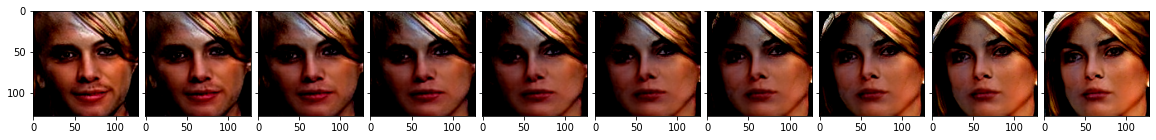

In [45]:
from mpl_toolkits.axes_grid1 import ImageGrid

fig = plt.figure(figsize=(20, 20))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(1, 10),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )

for ax, im in zip(grid, images):
    # Iterating over the grid returns the Axes.
    ax.imshow(im)

plt.show()

In [51]:
all_images = []
for i in range(8):
    noise_1 = tf.random.normal([1, latent_dim])
    noise_2 = tf.random.normal([1, latent_dim])


    vec = noise_2 - noise_1
    noise = noise_1

    steps = 8

    images = []
    for i in range(steps):
        noise = noise + (1/steps)*vec
        images.append(generate_gan_image(noise))
    all_images.append(images)

In [53]:
all_images = np.array(all_images).flatten()

<ipython-input-53-623c021b58de>:1: FutureWarning: The input object of type 'Image' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Image', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  all_images = np.array(all_images).flatten()
<ipython-input-53-623c021b58de>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  all_images = np.array(all_images).flatten()


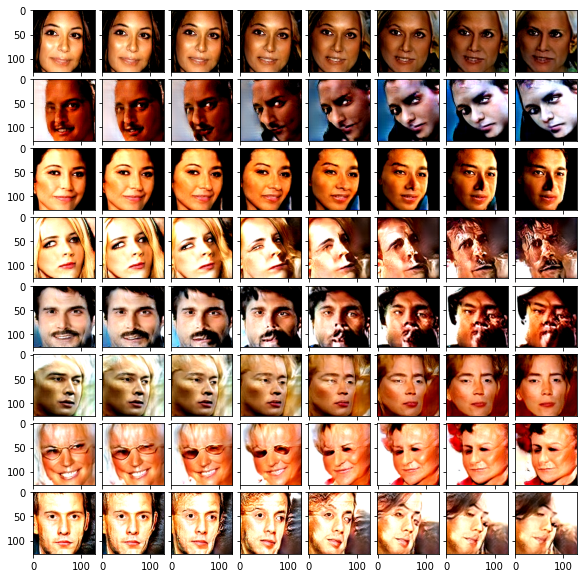

In [54]:
from mpl_toolkits.axes_grid1 import ImageGrid

fig = plt.figure(figsize=(10, 10))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(8, 8),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )

for ax, im in zip(grid, all_images):
    # Iterating over the grid returns the Axes.
    ax.imshow(im)

plt.show()

In [59]:
# Given a set of images, show an animation.
def animate(images):
  #images = np.array(images)
  #converted_images = np.clip(images * 255, 0, 255).astype(np.uint8)
  imageio.mimsave('./animation.gif', images)
  return embed.embed_file('./animation.gif')

In [57]:
long_walk = []


single_step = 8

num_targets = 20

pos = tf.random.normal([1, latent_dim])

for i in tqdm(range(num_targets)):
    target = tf.random.normal([1, latent_dim])
    vec = target - pos
    for _ in range(single_step):
        pos = pos + vec*(1/single_step)
        long_walk.append(generate_gan_image(pos))

100%|██████████| 20/20 [01:57<00:00,  5.87s/it]



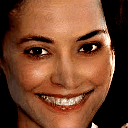

In [60]:
animate(long_walk)